# Bibliotecas y variables glaboles.

In [1]:
import pandas as pd
from random import randint
CASO_PROMEDIO = pd.read_csv("./data.csv")
import matplotlib.pyplot as plt
TESTS = 1000

# <code>Clase y Objetos<code>

In [2]:
import string


class Music:
    def __init__(self,data) -> None:
        self.trackName = data[0]
        self.artist = data[1]
        self.album = data[2]
        self.isrc = data[3]
        self.duration = data[4]
        self.year = data[5]
        self.month = data[6]
        self.day = data[7]
        self.i = 0
    def __eq__(self, __o: object) -> bool:
        if type(self) != type(__o):
            return False
        for attr,value in self.__dict__.items():
            if value != getattr(__o,attr):
                return False
        return True
        #for attr,value in self.__dict__.items():
    def __repr__(self) -> str:
        str = ""
        str += f"Track Name: {self.trackName}\n"
        # str+= f"\tArtist: {self.artist}\n"
        # str+= f"\tAlbum: {self.album}\n"
        str+= f"\tIsrc: {self.isrc}\n"
        # str+= f"\tDuration(min): {self.duration}\n"
        # str+= f"\tDate: {self.year}/{self.month}/{self.day}\n"
        return str

class HashTable:
    def __init__(self,attr) -> None:
        self.table = {}
        self.__attr = attr
        self.CountK=0
        self.CountPrimos=0
        self.CountOrd =0
        self.CountStr =0
        self.CountM1 = 0
        self.CountM2 = 0
        self.CountEM1 = 0
        self.CountEM2 = 0
        self.CountMemHash = 0
        self.inserciones = 0

    def CountHash(self):
        return self.CountPrimos+self.CountOrd+self.CountStr

    def putMetodo_1(self,nodo:Music):                           #O(m+k+srqt n)
        attr = str(getattr(nodo,self.__attr))                   #7
        key = self.hash(attr)                                   #O(k+ srqt n)
        if not key in self.table:                               #6
            self.table[key] = None                              #6
        while self.table[key] != None:                          #m
            key+="0"                                            #4(m-1)
            if key in self.table:                               #5(m-1)
                continue                                        #m-1
            self.table[key] = None                              #5(m-1)
        self.table[key] = nodo                                  #5
        #P(m,k,n) = 16m + k+srqt n +12
    def getMetodo_1(self,nodo):
        self.CountM1=0
        self.CountEM1=1
        h = self.hash(str(getattr(nodo,self.__attr)))           #O(k+sqrt n)
        if not h in self.table:                                 #6
            self.CountM1=1
            return None                                         #2
        while self.table[h]!=nodo:                              #m
            self.CountM1+=1
            self.CountEM1+=1
            h+="0"                                              #4(m-1)
        return self.table[h]                                    #4
    #P(k,n,p,m) = k + sqrt n + p + 5m + 8

    def putMetodo_2(self,nodo:Music):                           #O(k+sqrt n)
        self.CountEM2 = 0
        attr = str(getattr(nodo,self.__attr))                   #6
        key = self.hash(attr)                                   #O(k+sqrt n)
        if not key in self.table:                               #5
            self.table[key] = {}                                #5
        i=self.inserciones                                      #5
        self.inserciones+=1                                     #4
        if not i in self.table[key]:                            #6
            self.table[key][i]=None                             #6
        self.table[key][i]=nodo                                 #6

        #P(k,n)=k+sqrt n + 47
    def getMetodo_2(self,nodo):
        self.CountM2=0
        self.CountEM2 = 1
        h = self.hash(str(getattr(nodo,self.__attr)))           #O(k+sqrt n)
        if not h in self.table:                                 #6
            self.CountM2 = 1
            return None                                         #2
        for k in self.table[h]:                                 #m+1
            self.CountM2 +=1
            if self.table[h][k] == nodo:                        #7m
                return nodo                                     #2m
        return None                                             #2
    #P(k,n,m,p)=k+sqrt n + 10m + 11
    def hash(self,cadena:str):      #O(k+sqrt n)
        self.CountMemHash = 0
        cri = self.criba()          #O(1)       #k:longitud de la lista
        has = ""                    #3
        dp = {}                     #3
        n = len(cadena)
        primos = None               #3
        for c in cadena:            #(k+1)
            self.CountK+=1
            if not c in dp:         #k5
                dp[c] = None        #k4
            c_int = ord(c)          #k4                     n:es el número en código ascii
            if dp[c] == None:       #k5
                dp[c] = self.intListToStr(\
                    self.countingSort(\
                    self.descomponerPrimos(c_int,cri)))    #k(log n + log n + sqrt n)
            has+=dp[c]   #k(log n )
        for key in dp.keys():
            self.CountMemHash+=len(dp[key])
        return has          #2


    def criba(self,n=255):                        #O(1)
        i=2                                 #4
        cri = [0 for _ in range(n+1)]       #8
        while i < n+1:                      #256
            if not cri[i]:                  #255*4
                mult = i                    #255*3
                while mult <= n:          #255*4(255+1)
                    mult+=i                 #255*4
                    if mult <= n:         #255*4
                        cri[mult]= i        #255*3
            i+=1                            #255
        return cri                          #2

    def descomponerPrimos(self,entero,cri):                 #O(log n )
        self.CountPrimos=0
        primos = []                         #3          n:entero
        while cri[entero] != 0:             #5(logn + 1)
            self.CountPrimos+=1
            primo = cri[entero]             #4log n
            primos.append(primo)            #3log n
            entero = entero // primo        #4log n
        primos.append(entero)               #3
        return primos                       #2

    def countingSort(self,listaEnteros):                    #O(log n + sqrt n)   n:es el número factorizado
        self.CountOrd=0
        if len(listaEnteros)==1:
            self.CountOrd+=1
            return listaEnteros
        i=0
        C = [0 for _ in range(max(listaEnteros)+1)]
        while i < len(listaEnteros):
            self.CountOrd+=1
            C[listaEnteros[i]] = C[listaEnteros[i]] + 1
            i+=1
        i=1
        while i<len(C):
            self.CountOrd+=1
            C[i]=C[i]+C[i-1]
            i+=1
        i=0
        B = [0 for _ in range(len(listaEnteros))]
        while i < len(listaEnteros):
            self.CountOrd+=1
            B[C[listaEnteros[i]]-1]=listaEnteros[i]
            C[listaEnteros[i]]=C[listaEnteros[i]]-1
            i+=1
        return B

    def intListToStr(self,intList): #O(log n)    n:es el número factorizado
        self.CountStr=0
        conv = ""
        i = 0
        n = len(intList)
        while i < n:
            self.CountStr+=1
            c = str(intList[i])
            conv+=c
            i+=1
        return conv

# <code>Funciones<code>

In [3]:
def obtenerDatos(db:pd.DataFrame,len):
    return [Music(list(db.iloc[i])) for i in range(len)]
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)

### Descomponer ASCII en primos.
Sea $n$ la representación en ASCII de un caracter, calcular sus factores primos utilizando la criba genera un complejidad $\mathcal{O}(\log n)$ ya que en cada iteración estamos dividendo entre un factor el propio número hasta llegar a 0.

Text(0, 0.5, 'Operaciones')

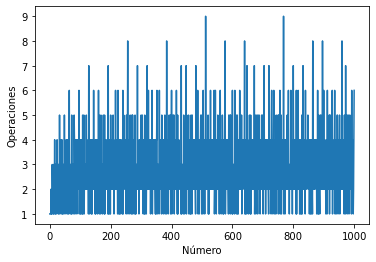

In [4]:
X = range(1001)
Y=[]
for i in X:
    ht = HashTable("")
    c = ht.criba(i)
    Y.append(len(ht.descomponerPrimos(i,c)))
plt.plot(X,Y)
plt.xlabel("Número")
plt.ylabel("Operaciones")

### Ordenar Factores Primos.
Dado que la longitud de esta lista es aproximadamente $\log n$ y el mayor del conjunto es menor o igual a $\sqrt n$ entonces la complejidad de countingSort para este caso queda como:
$$\mathcal{O}(\log n + \sqrt n)$$

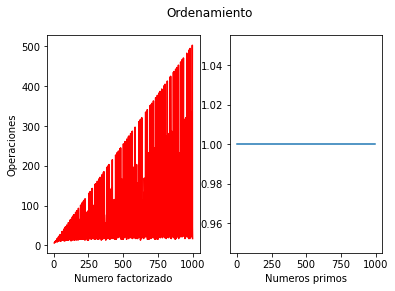

In [5]:
X = []
Y=[]
Y_PRIMOS =[]
X_PRIMOS = []
for i in range(1001):
    ht = HashTable("")
    c = ht.criba(i)
    l=ht.descomponerPrimos(i,c)
    #descartando a los numeros primos
    ht.countingSort(l)
    if len(l) > 1:
        X.append(i)
        Y.append(ht.CountOrd)
    else:
        X_PRIMOS.append(i)
        Y_PRIMOS.append(ht.CountOrd)
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Ordenamiento")
ax[0].plot(X,Y,color="r")
ax[0].set_xlabel("Numero factorizado")
ax[0].set_ylabel("Operaciones")
ax[1].set_xlabel("Numeros primos")
ax[1].plot(X_PRIMOS,Y_PRIMOS)



**Nota:** Si vemos la implementación retornamos directamente cuando recibimos un numero primo pues al no hacer esto <code>countingSort</code> se volvería lineal.

### Enteros a Cadenas.
Al final debemos convertir estos números en cadenas la cual tiene una complejidad $$\mathcal{O}(\log n)$$ pues aproximadamente es la cantidad de primos.


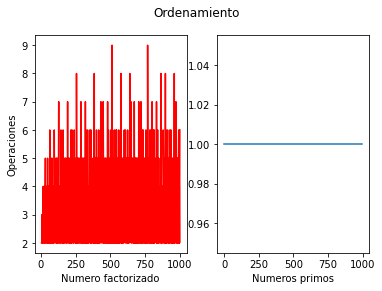

In [6]:
X = []
Y=[]
Y_PRIMOS =[]
X_PRIMOS = []
for i in range(1001):
    ht = HashTable("")
    c = ht.criba(i)
    l=ht.descomponerPrimos(i,c)
    #descartando a los numeros primos
    ht.countingSort(l)
    ht.intListToStr(l)
    if len(l) > 1:
        X.append(i)
        Y.append(ht.CountStr)
    else:
        X_PRIMOS.append(i)
        Y_PRIMOS.append(ht.CountStr)
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Ordenamiento")
ax[0].plot(X,Y,color="r")
ax[0].set_xlabel("Numero factorizado")
ax[0].set_ylabel("Operaciones")
ax[1].set_xlabel("Numeros primos")
ax[1].plot(X_PRIMOS,Y_PRIMOS)

### Hash
Sumando las complejidades anteriores obtenemos:
$$\mathcal{O}(k+\log n + \sqrt n + \log n)$$
$$\mathcal{O}(k+\sqrt n)$$
**Nota**:Después de ciertas iteraciones al usar programación dinámica la complejidad  se puede ver reducida a:
$$\mathcal{O}(k)$$
Ya que no tenemos que volver a recalcular las transformaciones de cada caracter y simplemente accedemos en tiempo constante al diccionario <code>dp</code>

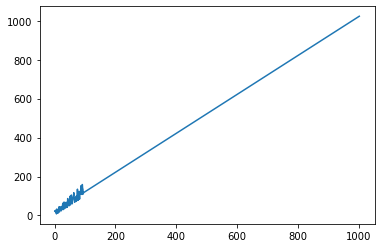

In [7]:
s=""
import string
l = string.printable
l = sorted(l)[5:]
# print(l)
X=[]
Y=[]
for i in range(1001):
    ht = HashTable("")
    s+=l[i%len(l)]
    X.append(i+1)
    ht.hash(s)
    Y.append(ht.CountHash()+ht.CountK)
plt.plot(X,Y)



# <code>Método_1</code>
## Análisis de Complejidad Temporal.
### Mejor Caso de Complejidad.
Tras insertar $m$ nodos pero ninguno de estos colisiona entonces todo queda en términos de la función hash y el acceso al diccionario.
$$\Omega(k+\sqrt n)$$
Donde $k$ es la longitud de la cadena y $n$ representa el número ASCII de un caracter.


Text(0, 0.5, 'Operaciones')

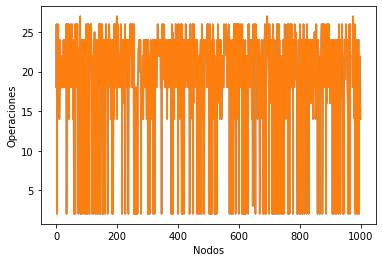

In [8]:
df = pd.read_csv("./info_ord_len(Name).csv")
musicas= obtenerDatos(df,TESTS)
X = range(TESTS)
Y=[]
ht = HashTable("isrc")
for m in musicas:
    ht.putMetodo_1(m)
for m in musicas:
    ht.getMetodo_1(m)
    Y.append(ht.CountM1+ht.CountHash())
plt.plot(X,Y)
plt.plot(X,Y)
plt.xlabel("Nodos")
plt.ylabel("Operaciones")

### Peor Caso de Complejidad Temporal.
Si deseamos insertar $m$ nodos pero todos ellos colisionan entre si, entonces tendremos que agregar $m-1$ ceros para tratar con la colisiones, en conjunto con el costo de crear el hash para el nodo.
$$\mathcal{O}(m+k+\sqrt n)$$

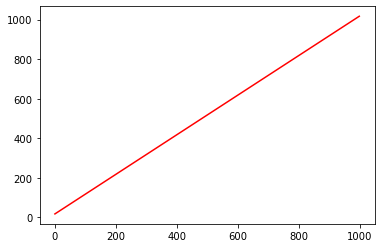

In [9]:
import copy
nodo = musicas[0]
X = range(TESTS)
Y = []
H = []
ht = HashTable("isrc")
for i in X:
    cp = copy.copy(nodo)
    cp.duration+=i
    ht.putMetodo_1(cp)

for i in X:
    cp = copy.copy(nodo)
    cp.duration+=i
    ht.getMetodo_1(cp)
    Y.append(ht.CountM1+ht.CountHash())
plt.plot(X,Y,color='r')

**Nota:** Para generar las colisiones en este caso, hemos decidido insertar siempre el mismo nodo con una ligera variación en otro de sus atributos para que así, las comparaciones no retornen desde la primera iteración. La razón de colocar el mismo nodo es que no estamos seguros de como generar cadenas diferentes que nos den el mismo hash. Es importante aclarar esto porque la función hash al convertir el mismo nodo se comporta de manera "constante" y no se nota en la gráfica la complejidad que suma

### Caso Promedio.
Si deseamos insertar $m$ nodos en nuestra tabla hash con el método 1 en un conjunto aleatorio donde existan una cierta cantidad de colisiones y varias longitudes de cadenas tenemos:
$$\theta(k+\sqrt n)$$
Donde $k$ es la longitud de la cadena y $n$ representa numero ASCII de un caracter.


Text(0, 0.5, 'Cantidad de Operaciones Realizadas')

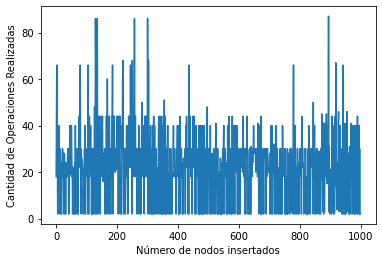

In [10]:
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
X = range(TESTS)
Y = []
ht = HashTable("trackName")
for m in musicas:
    ht.putMetodo_1(m)
for m in musicas:
    ht.getMetodo_1(m)
    Y.append(ht.CountHash()+ht.CountM1)
plt.plot(X,Y)
plt.xlabel("Número de nodos insertados")
plt.ylabel("Cantidad de Operaciones Realizadas")

## Análisis de Complejidad Espacial.
### Mejor Caso de Complejidad Espacial.
Cuando colocamos $m$ nodos y ninguno de estos colisiona entonces al hash no se le añade ningún caracter extra. Por otra parte el algoritmo para transformar lo llave utiliza un diccionario destinado a almacenar resultados previos de caracteres diferentes en la cadena por lo que su complejidad suma al consumo de memoria, siendo el mejor caso cadenas de longitud diferente pero con un mismo caracter.
$$S=aaaaa....$$
$$Space(1)$$

Text(0, 0.5, 'Cantidad de Memoria Consumida')

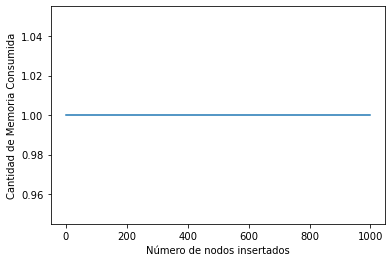

In [11]:
nodo = musicas[0]
nodo.trackName = "a"
X = range(TESTS)
Y = []
ht = HashTable("trackName")
for i in X:
    ht.putMetodo_1(nodo)
    nodo.trackName+='a'
nodo.trackName = "a"
for i in X:
    ht.getMetodo_1(nodo)
    nodo.trackName+='a'
    Y.append(ht.CountEM1)
plt.plot(X,Y)
plt.xlabel("Número de nodos insertados")
plt.ylabel("Cantidad de Memoria Consumida")

### Peor Caso de Complejidad Espacial.
Si tenemos $m$ nodos en los cuales el atributo que vamos a transformar sigue el siguiente patrón:
$$S=!'\#\$...xyz...²■$$
Es decir, que en la medida de lo posible los caracteres sean todos diferentes entre si hará al diccionario <code>dp</code> crecer de manera lineal hasta llegar a 255 porque es el máximo valor para los códigos ASCII.En adelante todo queda en función de los ceros que se agreguen por colisiones.

Text(0, 0.5, 'Cantidad de Memoria Consumida')

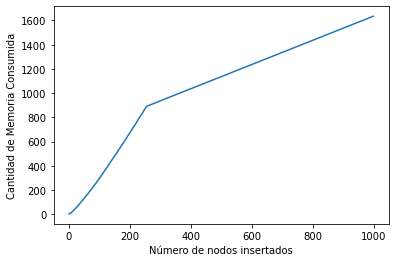

In [12]:
nodo = musicas[0]
nodo.trackName = ""
j=0
X = range(TESTS)
Y = []
ht = HashTable("trackName")
s = ''
for i in X:
    cp = copy.copy(nodo)
    cp.duration+=i
    if i < 256:
        c = chr(i)
        s+=c
    cp.trackName+=s
    ht.putMetodo_1(cp)
s = ""
for i in X:
    cp = copy.copy(nodo)
    cp.duration+=i
    if i < 256:
        c = chr(i)
        s+=c
    cp.trackName+=s
    ht.getMetodo_1(cp)
    Y.append(ht.CountEM1+ht.CountMemHash)
plt.plot(X,Y)
plt.xlabel("Número de nodos insertados")
plt.ylabel("Cantidad de Memoria Consumida")

Aquí se puede apreciar como entorno a 255 la gráfica se comporta de forma lineal.

### Caso promedio.
Al hashear cadenas aleatorias podemos tener más o menor caracteres diferentes sin importar la longitud de la cadena lo cual es la complejidad de usar <code>dp</code>. Otro factor que suma es la existencia de colisiones que hagan concatenar ceros a los hashes pero siendo una función con buena dispersión tendremos solo la complejidad de transformar la llave.
$$\theta(C)$$
$$1\leq C \leq C_{MAX}$$

Text(0, 0.5, 'Cantidad de Memoria Consumida')

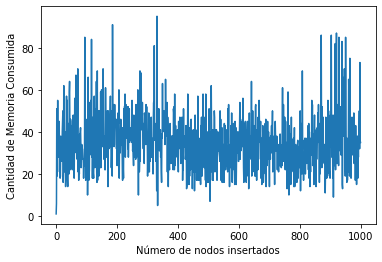

In [13]:
X = range(TESTS)
Y = []
ht = HashTable("trackName")
for m in musicas:
    ht.putMetodo_1(m)
for m in musicas:
    ht.getMetodo_1(m)
    Y.append(ht.CountMemHash+ht.CountEM1)
plt.plot(X,Y)
plt.xlabel("Número de nodos insertados")
plt.ylabel("Cantidad de Memoria Consumida")

# <code>Método_2</code>
## Análisis de Complejidad Temporal.
### Mejor Caso de Complejidad.
Tras insertar $m$ nodos en nuestra tabla pero no colisiona ninguno de ellos el ciclo que itera sobre las llaves del segundo diccionario tendrá una complejidad constante ya que solo hay un elemento por lo tanto la función hash sera nuestra complejidad.
$$\Omega(k+\sqrt n )$$

Text(0, 0.5, 'Operaciones Realizadas')

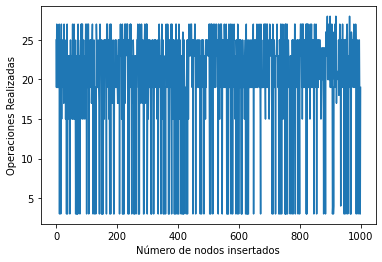

In [14]:
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
X = range(TESTS)
Y = []
ht = HashTable("isrc")
for m in musicas:
    ht.putMetodo_2(m)
for m in musicas:
    ht.getMetodo_2(m)
    Y.append(ht.CountHash()+ht.CountM2)
plt.plot(X,Y)
plt.xlabel("Número de nodos insertados")
plt.ylabel("Operaciones Realizadas")

### Peor caso de complejidad.
Si insertamos $m$ nodos pero todos ellos colisionan entonces cuando queramos buscar uno de ellos habrá que iterar sobre todas las llaves teniendo como peor caso que la ultima de estas llaves sea la asociada a nuestro nodo buscado quedando una complejidad de:
$$\mathcal{O}(m+k+\sqrt n)$$

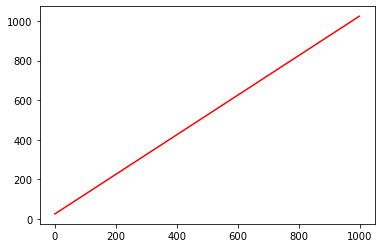

In [15]:
nodo = musicas[0]
X = range(TESTS)
Y = []
ht = HashTable("isrc")
for i in X:
    cp = copy.copy(nodo)
    cp.duration+=i
    ht.putMetodo_2(cp)

for i in X:
    cp = copy.copy(nodo)
    cp.duration+=i
    ht.getMetodo_2(cp)
    Y.append(ht.CountM2+ht.CountHash())
plt.plot(X,Y,color='r')

### Caso promedio de complejidad.
Si nuestra función es lo suficientemente dispersa entonces las colisiones serán muy poco probables de que ocurran por lo que el ciclo que itera sobre las llaves el diccionario asociado al hash será constante y teniendo solo el coste que representa hashear nuestro nodo.
$$\theta(k+\sqrt n)$$

Text(0, 0.5, 'Cantidad de Operaciones Realizadas')

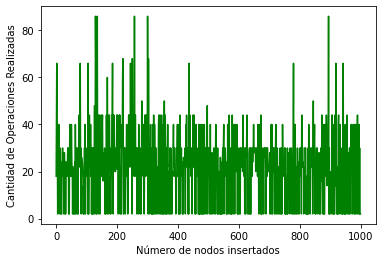

In [16]:
X = range(TESTS)
Y = []
ht = HashTable("trackName")
for m in musicas:
    ht.putMetodo_2(m)
for m in musicas:
    ht.getMetodo_2(m)
    Y.append(ht.CountHash()+ht.CountM1)
plt.plot(X,Y,color='g')
plt.xlabel("Número de nodos insertados")
plt.ylabel("Cantidad de Operaciones Realizadas")

## Análisis de Complejidad Espacial.
### Mejor Caso.
El método dos no reasigna valores al hash ni crea nuevas cadenas entonces los casos de complejidad espacial quedan al margen de nuestra función hash, en especifico del diccionario <code>dp</code>.
Para el mejor caso de complejidad de la función hash tenemos cadenas construidas con un mismo caracter como la siguiente
$$S=aaaa...$$
En esta situación <code>dp</code> solo almacena un valor de los 2 factores primos que constituyen el número ASCII del la letra $a$
$$Space(1)$$

Text(0, 0.5, 'Cantidad de Memoria Consumida')

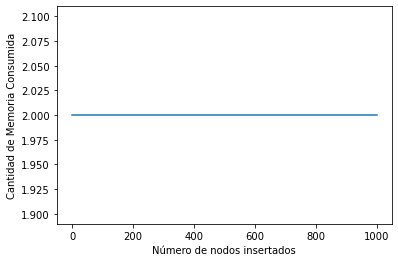

In [17]:
nodo = musicas[0]
nodo.trackName = ""
X = range(TESTS)
Y = []
ht = HashTable("trackName")
for i in X:
    nodo.trackName+='a'
    ht.putMetodo_2(nodo)
for i in X:
    nodo.trackName+='a'
    ht.getMetodo_2(nodo)
    Y.append(ht.CountMemHash)
plt.plot(X,Y)
plt.xlabel("Número de nodos insertados")
plt.ylabel("Cantidad de Memoria Consumida")

### Peor Caso de Complejidad.
Si tenemos $m$ nodos en los cuales el atributo que vamos a transformar sigue el siguiente patrón:
$$S=!'\#\$...xyz...²■$$
En la medida de lo posible los caracteres sean todos diferentes entre si pues aquí al diccionario <code>dp</code> crecería de manera lineal hasta llegar a 255 porque es el máximo valor para los códigos ASCII.En adelante se comporta "constante".
$$C_{MAX}=255$$
$$Space(C_{MAX})$$

Text(0, 0.5, 'Cantidad de Memoria Consumida')

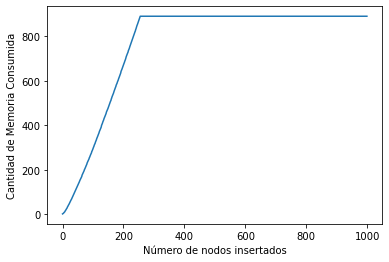

In [18]:
nodo = musicas[0]
nodo.trackName = ""
X = range(TESTS)
Y = []
ht = HashTable("trackName")
s = ""
for i in X:
    cp = copy.copy(nodo)
    s+=chr(i%256)
    cp.trackName+=s
    ht.putMetodo_2(cp)
s = ""
for i in X:
    cp = copy.copy(nodo)
    s+=chr(i%256)
    cp.trackName+=s
    ht.getMetodo_2(cp)
    Y.append(ht.CountEM2+ht.CountMemHash)
plt.plot(X,Y)
plt.xlabel("Número de nodos insertados")
plt.ylabel("Cantidad de Memoria Consumida")

**Nota:** El valor da alrededor de 900 y no 255 porque no estamos contabilizando las llaves en este diccionario sino las longitudes de cada subcadena asociada a cada uno de los 256 caracteres.

### Caso Promedio de Complejidad.
Dependiendo de la cadena a transformar tendrá mas o menos caracteres diferentes que afectaran al crecimiento de <code>dp</code> pero que en promedio estará entorno a 1 y 255 caracteres. Hay que tener en cuenta que la cantidad de caracteres diferentes no depende de la longitud de la cadena por lo que este consumo de memoria queda solo bajo lo demanda recuperar resultados previos.

Text(0, 0.5, 'Cantidad de Memoria Consumida')

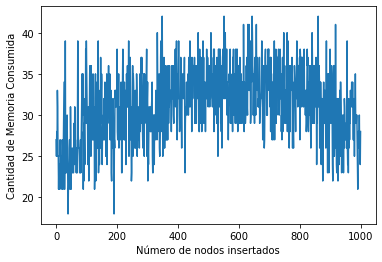

In [19]:
X = range(TESTS)
Y = []
ht = HashTable("isrc")
for m in musicas:
    ht.putMetodo_2(m)
for m in musicas:
    ht.getMetodo_2(m)
    Y.append(ht.CountEM2+ht.CountMemHash)
plt.plot(X,Y)
plt.xlabel("Número de nodos insertados")
plt.ylabel("Cantidad de Memoria Consumida")